In [4]:
from CardiacMap.cascade_parser import cascade_import
from matplotlib import pyplot as plt
import numpy as np
import torch

from scipy import ndimage

import timeit

from dash import Dash, html, dcc, callback, Output, Input
import plotly.express as px
import pandas as pd

In [5]:
im_raw = cascade_import("2012-02-13_Exp000_Rec005_Cam3-Blue.dat")

In [17]:
import plotly.express as px

fig = px.imshow(im_raw, animation_frame=0)

TypeError: imshow() got an unexpected keyword argument 'cmap'

In [100]:
import plotly.graph_objects as go # or plotly.express as px
# fig = go.Figure() # or any Plotly Express function e.g. px.bar(...)
# fig.add_trace( ... )
# fig.update_layout( ... )

from dash import Dash, dcc, html

app = Dash()
app.layout = html.Div([
    dcc.Graph(figure=fig)
])

app.run_server(debug=True, use_reloader=True)  # Turn off reloader if inside Jupyter

In [26]:
im_raw[0].shape

(128, 128)

In [31]:
from PIL import Image

In [89]:
normalized = ((im_raw - im_raw.min()) / (im_raw.max() - im_raw.min()) * 255).astype('int8')

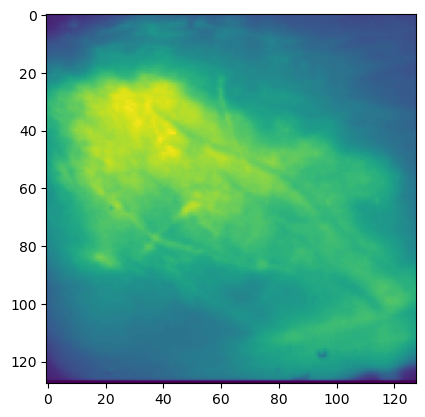

In [90]:
plt.imshow(normalized[100])

In [96]:
img = Image.fromarray(normalized[100], mode='L')

In [94]:
import io

In [97]:
img_byte_arr = io.BytesIO()
img.save(img_byte_arr, format='PNG')
img_byte_arr = img_byte_arr.getvalue()

In [101]:
import dash
from dash import html
import base64

app = dash.Dash()
encoded_image = base64.b64encode(img_byte_arr)
app.layout = html.Div([
    html.Img(src='data:image/png;base64,{}'.format(encoded_image.decode()))
])

if __name__ == '__main__':
    app.run_server(debug=True)

In [141]:
im_raw = np.vstack([im_raw] * 20)

In [143]:
from dash import Dash, dcc, html, Input, Output, callback
import plotly.express as px
app = Dash(__name__)

app.layout = html.Div([
    dcc.Graph(id='graph-with-slider'),
    dcc.Slider(
        0,
        5000 * 20 - 1,
        step=None,
        value=100,
        id='frame-slider',
        updatemode='drag'
    ),
    dcc.Graph(id='graph-signal')
])


@callback(
    Output('graph-with-slider', 'figure'),
    Input('frame-slider', 'value'))
def update_figure(img_idx):

    fig = px.imshow(im_raw[img_idx], binary_string=True)

    fig.update_layout(transition_duration=500)

    return fig

@callback(
    Output('graph-signal', 'figure'),
    Input('graph-with-slider', 'clickData'), 
    prevent_initial_call=True)
def display_click_data(clickData):
    if clickData is not None: 
        x = clickData['points'][0]['x']
        y = clickData['points'][0]['y']
    else:
        x, y = 64

    fig = px.line(im_raw[10:, x, y])
    
    return fig
    

if __name__ == '__main__':
    app.run(debug=True)